<a href="https://colab.research.google.com/github/sshd911/Kaggle/blob/main/NovozymesEnzymeStabilityPrediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.23.2 pycaret

In [ ]:
import pandas as pd
from pycaret.utils import enable_colab
from pycaret.regression import setup
from pycaret.regression import compare_models
from pycaret.regression import models
from pycaret.regression import create_model
from pycaret.regression import tune_model
from pycaret.regression import plot_model
from pycaret.regression import finalize_model
from pycaret.regression import predict_model
from pycaret.datasets import get_data
enable_colab()

In [ ]:
train_data = pd.read_csv("train_cleaned.csv")
test_data = pd.read_csv('test_cleaned.csv')

In [ ]:
train_data.info()

In [ ]:
clf = setup(data=train_data, target="tm", session_id=123, 
            ignore_features=["seq_id"])

In [ ]:
best = compare_models()
print(best)

In [ ]:
models()

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tuned = tune_model(lightgbm)

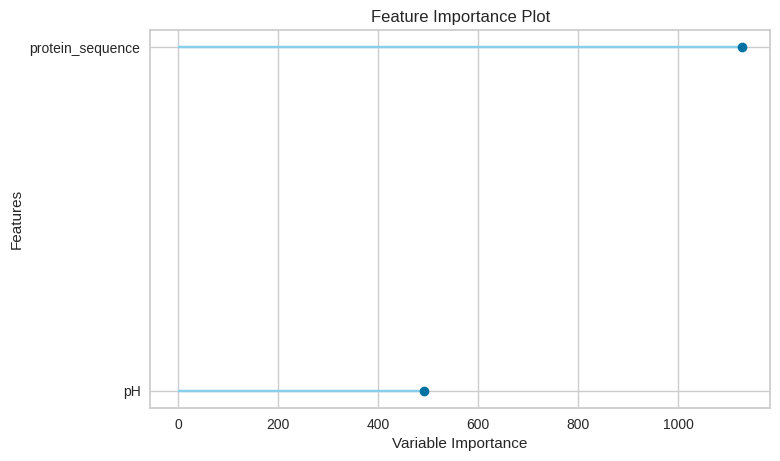

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(tuned, plot="feature")

In [ ]:
final = finalize_model(tuned)

In [ ]:
test_pred = predict_model(final, data=test_data)

In [29]:
submittion = test_pred[["seq_id", "Label"]]
submittion = submittion.rename(columns={"Label": "tm"})
submittion.to_csv("submittion.csv", index=False)

submittion

,seq_id,tm
0,31390,61.796618
1,31391,71.005848
2,31392,60.305899
3,31393,59.312041
4,31394,55.104915
...,...,...
2408,33798,52.091439
2409,33799,51.868600
2410,33800,53.020200
2411,33801,53.354879
